Grupo 9. Dámaso Sánchez Arenas y Eduardo Rodriguez De Castro Zaloña

# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as pr
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

# Descargamos el conjunto de datos que necesitamos

In [2]:
diabetes = datasets.load_diabetes()

# 1. Descripción y análisis del conjunto de datos

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

Los datos estan representados como un diccionario con las siguientes llaves:

- __Data__: Contiene los datos númericos. Representado como un array donde cada elemento es un array de                    elementos
- __Target__: Mediana  del precio de las viviendas en el bloque en cuestión
- __DESCR__: Descripción del conjunto de datos
- __Feature_names__: Son los nombres que caracterizan los elementos del array, de cada individuo del conjunto de datos

In [4]:
diabetes['feature_names'] #Obtenemos las caracteristicas de cada individuo del dataset en cuestión

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
diabetes['target'] #Vemos el valor del target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [6]:
#Obtenemos los valores de las caracteristicas de cada uno de los individuos 
df = pd.DataFrame(data=diabetes['data'], columns=diabetes['feature_names']) 
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

In [7]:
#Obtenemos que las caracteristicas de los individuos son de tipo numerico, concreatamente: float64
df.dtypes

age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object

In [8]:
# Mostramos datos estadísticos de cada columna
df.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   1.327024e-16 -4.574646e-16  3.777301e-16 -3.830854e-16 -3.412882e-16  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260974e-01 -1.377672e-01  
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324879e-02 -3.317903e-02  
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947634e-03 -1.077698e-03  
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243323e-02  2.791705e-02  
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335990e-01  1.356118e-01

Estos datos nos dan una idea de como estan distribuidos los datos con los percentiles. 
Podemos ver los dos extremos de las variables (min,max) y la media.

Para apoyarnos y poder sacar mejores conclusiones vamos a realizar unos graficos

C:\Users\dsanchar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


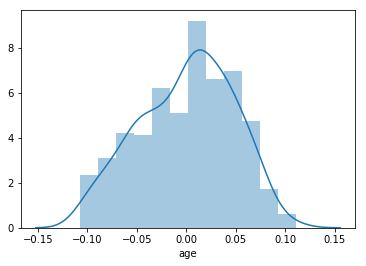

In [9]:
sns.distplot(df['age'])

C:\Users\dsanchar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


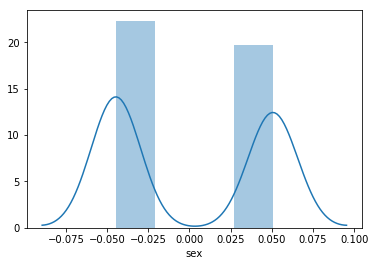

In [10]:
sns.distplot(df['sex'])

C:\Users\dsanchar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


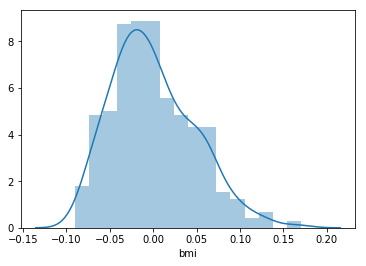

In [11]:
sns.distplot(df['bmi'])

C:\Users\dsanchar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


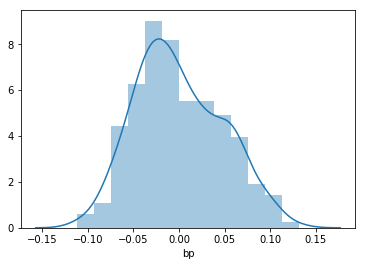

In [12]:
sns.distplot(df['bp'])

C:\Users\dsanchar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


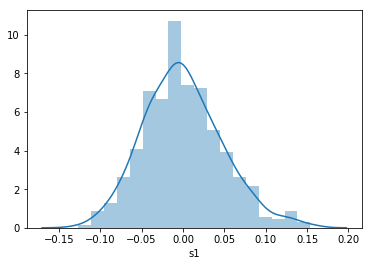

In [13]:
sns.distplot(df['s1'])

C:\Users\dsanchar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


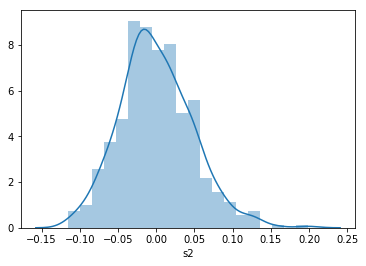

In [14]:
sns.distplot(df['s2'])

C:\Users\dsanchar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


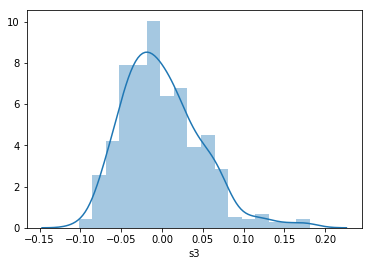

In [15]:
sns.distplot(df['s3'])

C:\Users\dsanchar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


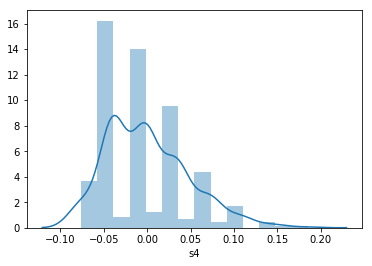

In [16]:
sns.distplot(df['s4'])

C:\Users\dsanchar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


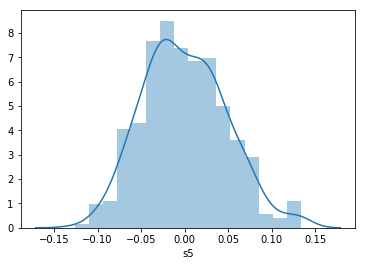

In [17]:
sns.distplot(df['s5'])

C:\Users\dsanchar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


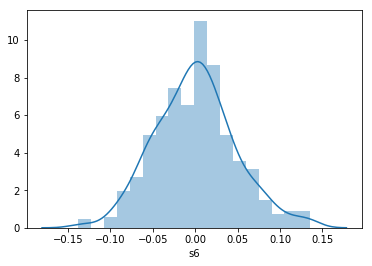

In [18]:
sns.distplot(df['s6'])

Vemos como la mayoria de las caracteristicas siguen una distribución normal es decir que tienden a la media, la cual va creciendo poco a poco hasta llegar a su punto mas alto y despues empieza a disminuir. En cambio, la variable sexo se puede ver con facilidad que no sigue una distribucion normal y tiene mas picos.

A continuación, vamos a estudiar la correlación que existen entre las caracteristicas

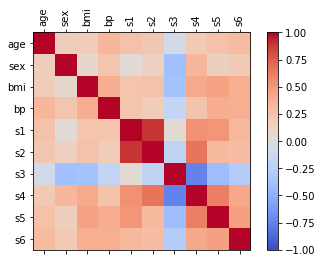

In [19]:
correlation = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

Como podemos ver existe una fuerte correlación entre las variables. LLama la atencion como la caracteristica s3 es la unica que tiene una correlacion baja con el resto de variables.

# 2. ¿Debemos normalizar o estandarizar las variables antes para usar perceptron multicapa?

Sí, se debe normalizar ya que el conjunto de datos contiene variables en distintas escalas. En este caso, al tratarse de un problema de regresión, también debemos normalizar la variable 'target' que queremos predecir.

In [20]:
from sklearn.preprocessing import StandardScaler

# Transformamos las variables de entrada
scaler_x = StandardScaler()
scaler_x.fit(diabetes.data)
diabetes['data_scaled'] = scaler_x.transform(diabetes.data)

# Y también transformamos la variable de salida
scaler_y = StandardScaler()
scaler_y.fit(diabetes.target.reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
diabetes['target_scaled'] = scaler_y.transform(diabetes.target.reshape(-1, 1))

 # Entrenamiento MLP

# 3. RED: MLP1 con una capa oculta de 200 neuronas

NOTA: NO CONSEGUIMOS QUITAR EL WARNING DE LA CONVERGENCIA A PESAR DE AUMENTAR EL NUMERO DE ITERACCIONES YA QUE SI LE AUMENTO DEMASIADO ME DA UN ERROR.

Se modifican el numero de capas y de neuronas. Por otro lado se modifica el numero maximo de iteracciones para que la curva pueda converger bien.

C:\Users\dsanchar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2222) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


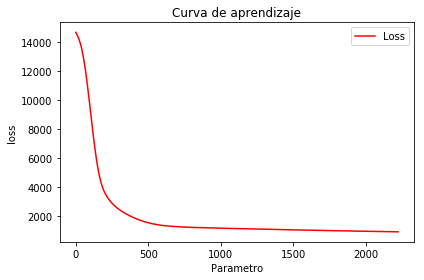

0.7147097420591193
0.3237309381176816


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Partimos el conjunto de datos en un 30% para test
X_train, X_test, y_train, y_test = train_test_split(diabetes.data_scaled, diabetes.target, 
                                                    test_size=0.3, random_state=0)

# Creamos un perceptrón multicapa
# optimiza el error cuadrático medio
# max_iter debe ser suficientemente alto para que la red se entrene y por ello lo aumentamos
max_iter = 2222
mlp = MLPRegressor(hidden_layer_sizes=(200, ),  # 1 CAPA OCULTA DE 200 NEURONAS
                   activation='relu',           # función de activación para las capas ocultas
                   solver='adam',               # algoritmo para descenso de gradiente
                   alpha=0.001,                 # mide cuánto cambiamos los parámetros en cada actualización
                   batch_size='auto',           # por defecto 200
                   max_iter=max_iter,           # número de pasadas por los datos de entrada 
                   verbose=False)               # mostrar loss después de cada pasada
mlp.fit(X_train, y_train)

# Pintar la evolución de la función de loss
plt.plot(range(max_iter), mlp.loss_curve_, color="r",  label="Loss")
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("loss"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

# Calculamos el coeficiente R^2 del modelo para entrenamiento y test (mejor valor es 1)
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

## Valor óptimo del parámetro con validación cruzada con K=10

Para ello, vamos a probar distintos valores de la tasa de aprendizaje. Modificamos la k a 10 como exige el enunciado.
Modificamos el número de iteracciones para que pueda converger correctamente.

In [22]:
from sklearn.model_selection import cross_val_score

alphas = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
cv_scores_mean=[]
cv_scores_std=[]

for alpha in alphas:
    mlp = MLPRegressor(hidden_layer_sizes=(200, ),  #1 capa oculta con 200 neuronas
                       activation='relu', 
                       solver='adam', 
                       alpha=alpha, 
                       batch_size='auto',
                       max_iter=100000,
                       verbose=False)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, diabetes['data_scaled'], diabetes['target_scaled'].ravel(), 
                             cv=10, scoring='neg_mean_squared_error') #CV = K = 10
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

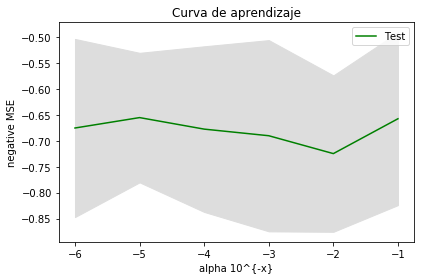

In [23]:
# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
plt.plot(np.log10(alphas), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(alphas), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("alpha 10^{-x}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Análisis del error

Vamos a analizar el error que comete el perceptrón con los datos originales y el valor del parámetro de regularización elegido.

NOTA: Este análisis que vamos a calcular no son obtenidas por un único perceptrón, sino por una agregación de los k perceptrones estimados en el k-fold, en nuestro caso 10.

In [24]:
from sklearn.model_selection import cross_val_predict

mlp = MLPRegressor(hidden_layer_sizes=(200, ), #1 capa oculta de 200 neuronas
                   activation='relu', 
                   solver='adam', 
                   alpha=0.001, 
                   batch_size='auto',
                   max_iter=10000) #Aumentamos el numero de iteracciones para que pueda converger correctamente
mlp.fit(X_train, y_train)

# Predecimos los precios para el conjunto de prueba
predicts_scaled = cross_val_predict(mlp, diabetes['data_scaled'], diabetes['target_scaled'].ravel(), cv=10)

# Escalamos los precios a la escala original
predicts = scaler_y.inverse_transform(predicts_scaled)

Text(0.5,1,'Distribución del error en valor absoluto')

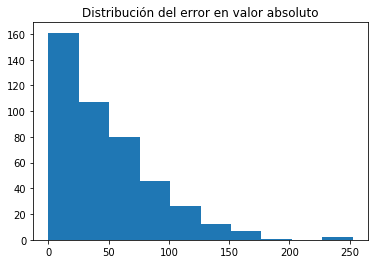

In [25]:
plt.hist(np.abs(diabetes.target - predicts))
plt.title('Distribución del error en valor absoluto')

La distribución del error muestra algunos valores demasiado elevados que no son deseables. En comparación con MLP2 podemos observar que en este caso el error es mayor.

Text(0.5,1,'Y Vs Y_pred')

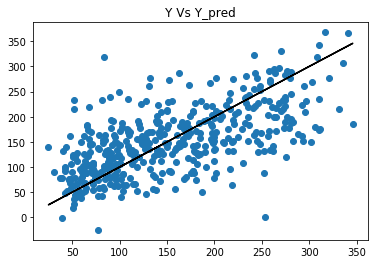

In [26]:
plt.scatter(diabetes.target, predicts) 
# Pintamos la referencia de la predicción perfecta
plt.plot(diabetes.target, diabetes.target, color='k') 

plt.title('Y Vs Y_pred')

Al pintar el gráfico vemos que existe dispersión continuamente pero en ningun momento se produce algo alarmante.

Esto seguramente quiere decir que se pueda mejorar la estimación y que hay que hacer algo con los valores.

# 3. MLP2 con dos capas ocultas de 10 neuronas cada una 

NOTA: NO CONSEGUIMOS QUITAR EL WARNING DE LA CONVERGENCIA A PESAR DE AUMENTAR EL NUMERO DE ITERACCIONES YA QUE SI LE AUMENTO DEMASIADO ME DA UN ERROR.

C:\Users\dsanchar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


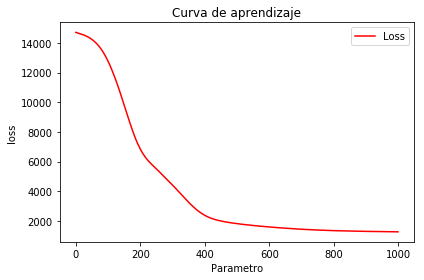

0.5970027735334549
0.35258880354960653


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Partimos el conjunto de datos en un 30% para test
X_train, X_test, y_train, y_test = train_test_split(diabetes.data_scaled, diabetes.target, 
                                                    test_size=0.3, random_state=0)

# Creamos un perceptrón multicapa
# optimiza el error cuadrático medio
# max_iter debe ser suficientemente alto para que la red se entrene
max_iter = 1000
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), # 2 CAPAS OCULTAS DE 10 NEURONAS CADA UNA
                   activation='relu',           # función de activación para las capas ocultas
                   solver='adam',               # algoritmo para descenso de gradiente
                   alpha=0.001,                 # mide cuánto cambiamos los parámetros en cada actualización
                   batch_size='auto',           # por defecto 200
                   max_iter=max_iter,           # número de pasadas por los datos de entrada 
                   verbose=False)               # mostrar loss después de cada pasada
mlp.fit(X_train, y_train)

# Pintar la evolución de la función de loss
plt.plot(range(max_iter), mlp.loss_curve_, color="r",  label="Loss")
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("loss"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

# Calculamos el coeficiente R^2 del modelo para entrenamiento y test (mejor valor es 1)
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

## Valor óptimo del parámetro con validación cruzada con K=10

In [28]:
from sklearn.model_selection import cross_val_score

alphas = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
cv_scores_mean=[]
cv_scores_std=[]

for alpha in alphas:
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10 ),  #2 capas ocultas con 10 neuronas cada una
                       activation='relu', 
                       solver='adam', 
                       alpha=alpha, 
                       batch_size='auto',
                       max_iter=100000, #AUMENTAMOS ITERACCIONES PARA QUE PUEDA CONVERGER BIEN
                       verbose=False)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, diabetes['data_scaled'], diabetes['target_scaled'].ravel(), 
                             cv=10, scoring='neg_mean_squared_error') #CV = 10
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

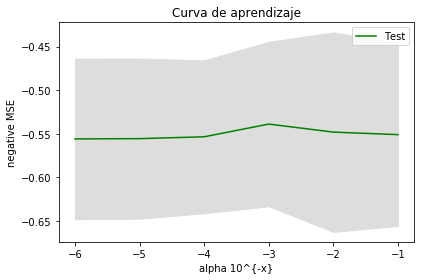

In [29]:
# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
plt.plot(np.log10(alphas), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(alphas), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("alpha 10^{-x}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Análisis del error

Vamos a analizar el error que comete el perceptrón con los datos originales y el valor del parámetro de regularización elegido.

NOTA: Este análisis que vamos a calcular no son obtenidas por un único perceptrón, sino por una agregación de los k perceptrones estimados en el k-fold.

In [30]:
from sklearn.model_selection import cross_val_predict

mlp = MLPRegressor(hidden_layer_sizes=(10,10 ), #2 CAPAS OCULTAS DE 10 NEURONAS CADA UNA
                   activation='relu', 
                   solver='adam', 
                   alpha=0.001, 
                   batch_size='auto',
                   max_iter=10000)
mlp.fit(X_train, y_train)

# Predecimos los precios para el conjunto de prueba
predicts_scaled = cross_val_predict(mlp, diabetes['data_scaled'], diabetes['target_scaled'].ravel(), cv=10)

# Escalamos los precios a la escala original
predicts = scaler_y.inverse_transform(predicts_scaled)

Text(0.5,1,'Distribución del error en valor absoluto')

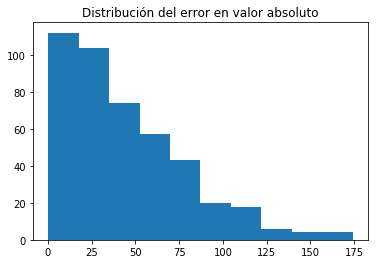

In [31]:
plt.hist(np.abs(diabetes.target - predicts))
plt.title('Distribución del error en valor absoluto')

La distribución del error muestra que en la MLP2 el error es mucho menor que en la MLP1, lo cual es positivo.

Text(0.5,1,'Y Vs Y_pred')

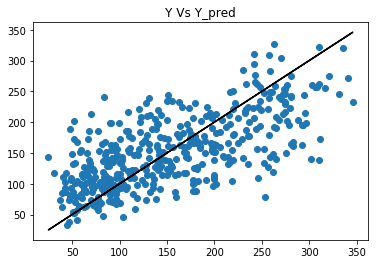

In [32]:
plt.scatter(diabetes.target, predicts) 
# Pintamos la referencia de la predicción perfecta
plt.plot(diabetes.target, diabetes.target, color='k') 

plt.title('Y Vs Y_pred')

Al pintar el gráfico vemos que existe dispersión continuamente pero en ningun momento se produce algo alarmante.

Esto seguramente quiere decir que se pueda mejorar la estimación y que hay que hacer algo con los valores.

# ¿Algunos de los perceptrones domina al otro? ¿Por qué crees que se producen las diferencias?